<h1>Chapter 02</h1>

<h2>supervised learning</h2>
feature + feature + ...... = input<br>
input + target = training data<br>
DATA = train data + test data

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

<h2>Sampling bias</h2>

In [2]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

kn.fit(train_input, train_target)
kn.score(test_input, test_target) ## accuracy = 0.0;;

0.0

<h2>Numpy</h2>

In [3]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr.shape)

(49, 2)


In [4]:
np.random.seed(44)
index = np.arange(49)
print(index)
np.random.shuffle(index)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[37  6 44 36  5 43 27 33 40 17 31 26 15 13 11  2 12 34 41 30 16 39 28 24
  8 18  9  4 10  0 19 21 29 14  1 47 38  7 42 25 22 23 46 48 32  3 45 35
 20]


In [5]:
# array indexing
## arr[a, b, c] >>>>> [arr[a], arr[b], arr[c]]

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


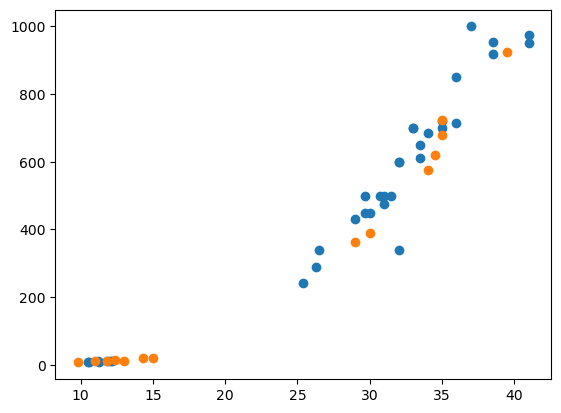

In [6]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.show()


In [7]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [8]:
print(kn.predict(test_input))
print(test_target)

[0 0 1 0 1 1 1 0 0 1 1 0 0 1]
[0 0 1 0 1 1 1 0 0 1 1 0 0 1]


<h2>2-2</h2>

In [9]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [10]:
import numpy as np

np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [11]:
fish_data = np.column_stack((fish_length, fish_weight))

In [12]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

<h2>train test split</h2>

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
print(train_input.shape, test_input.shape)
print(test_target)

(36, 2) (13, 2)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input.shape, test_input.shape)
print(test_target)

(36, 2) (13, 2)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

[0.]


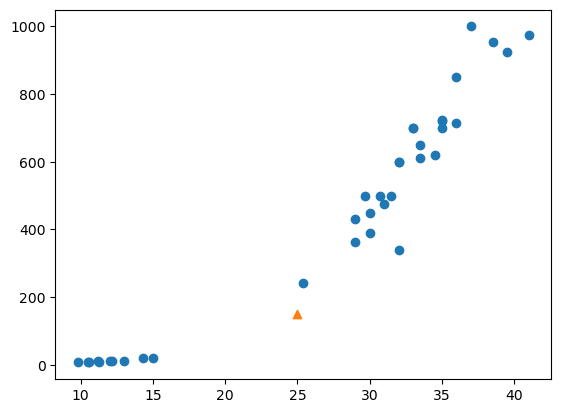

In [16]:
print(kn.predict([[25, 150]]))
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')

In [17]:
distances, indexes = kn.kneighbors([[25, 150]])

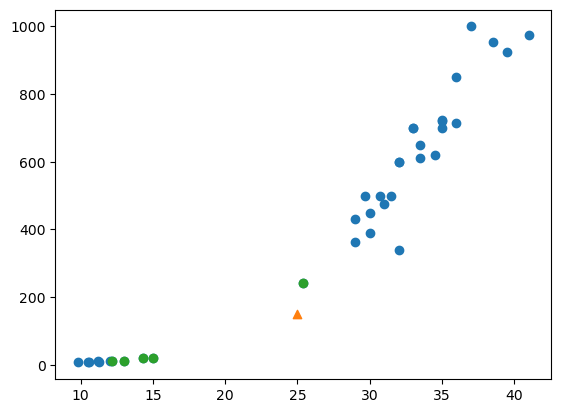

In [18]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1])
plt.show()

In [19]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [20]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


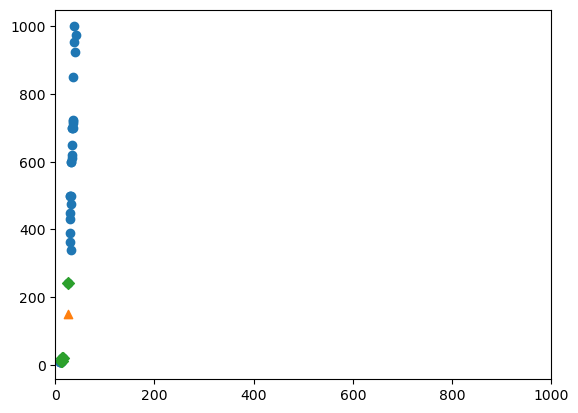

In [21]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.show()

<h2>Data preprocessing</h2>

In [22]:
##standard score

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [23]:
train_scaled = (train_input - mean) /std

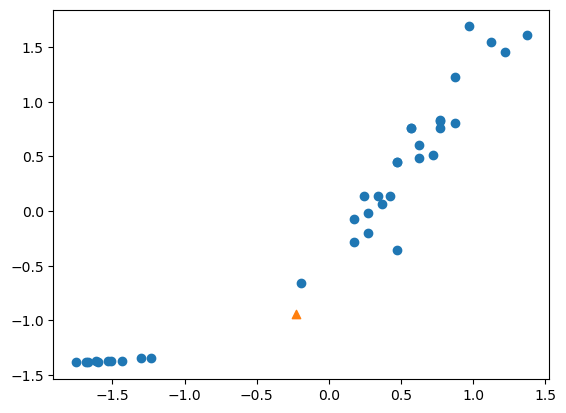

In [24]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.show()

In [25]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)
print(kn.predict([new]))

[1.]
